### 필수 패키지를 추가하세요.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/2021_07_12_DS_School')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/2021_07_12_DS_School'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 파일 읽기
 - titanic_train_y.csv을 읽어서 df_y 저장한 후 출력하세요.
 - titanic_train_passenger.csv을 읽어서 df_pass 저장한 후 출력하세요.
 - titanic_train_ticket.csv을 읽어서 df_ticket 저장한 후 출력하세요.

#### 데이터 설명
##### titanic_train_y.csv
   - PassengerId : 승객 번호, passenger데이터 외래 키(병합 시 on에 지정할 키)
   - Survived : 생존=1, 사망=0

##### titanic_train_passenger.csv
   - PassengerId : 승객 번호, y데이터와의 병합 시 사용할 기본 키
   - Pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
   - Name : 승객 이름
   - Sex : 성별
   - Age: 나이
   - SibSp : 함께 탑승한 형제 또는 배우자 수
   - Parch : 함께 탑승한 부모 또는 자녀 수
   - Ticket : 티켓 번호, ticket데이터의 외래 키(병합 시 on에 지정할 키)
   
##### titanic_train_ticket.csv
   - Ticket : 티켓 번호, passenger 데이터와의 병합 시 사용할 기본 키
   - Fare : 요금
   - embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [4]:
df_y = pd.read_csv('./data/titanic_train_y.csv')
df_y

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


In [5]:
df_pass = pd.read_csv('./data/titanic_train_passenger.csv')
df_pass

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450
...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369


In [6]:
df_ticket = pd.read_csv('./data/titanic_train_ticket.csv')
df_ticket

,Ticket,Fare,Cabin,Embarked
0,110152,86.500,B77,S
1,110413,79.650,E67,S
2,110465,52.000,C110,S
3,110564,26.550,C52,S
4,110813,75.250,D37,C
...,...,...,...,...
676,W./C. 6608,34.375,NaN,S
677,W./C. 6609,7.550,NaN,S
678,W.E.P. 5734,61.175,E31,S
679,W/C 14208,10.500,NaN,S


### 데이터 확인
 - df_y, df_pass, df_ticket의 정보를 조회하세요

In [ ]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
dtypes: int64(2)
memory usage: 14.0 KB


In [ ]:
df_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


In [ ]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ticket    681 non-null    object 
 1   Fare      681 non-null    float64
 2   Cabin     142 non-null    object 
 3   Embarked  680 non-null    object 
dtypes: float64(1), object(3)
memory usage: 21.4+ KB


### 데이터 병합
 - 먼저 df_pass와 df_ticket을 공통 열을 기준으로 left join으로 병합하여 df_pt에 저장하세요.
 - 다음으로 df_y와 df_pt를 inner join으로 병합하여 df에 저장하세요.

In [7]:
df_pt = pd.merge(df_pass, df_ticket, on='Ticket', how='left')
df_pt

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df = pd.merge(df_y, df_pt, on='PassengerId')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 결측치 처리
 - 각 열 별 na 개수를 조회하세요.
 - Age -> 평균, Cabin -> 'N', Embarked -> 'N'으로 결측치를 대체하세요.
 - 마지막으로 na 개수를 다시 조회하세요.

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          676
Embarked         2
dtype: int64

In [9]:
df['Age'] =df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('N')
df['Embarked'] = df['Embarked'].fillna('N')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 데이터 변환 #1
 - Cabin의 고윳값 별 개수를 출력하세요.
   - value_counts()
 - Cabin의 값을 첫 글자만 남도록 수정하세요.
   - s.str 슬라이싱

In [ ]:
df['Cabin'].value_counts()

N              676
B96 B98          4
G6               4
C22 C26          4
B51 B53 B55      4
              ... 
D37              1
A32              1
C82              1
B38              1
C148             1
Name: Cabin, Length: 129, dtype: int64

In [10]:
df['Cabin'] = df['Cabin'].str[0]
df['Cabin']

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

### 불필요한 열 삭제
 - 학습에 사용하지 않은 'PassengerId', 'Name','Ticket' 열을 삭제하세요.

In [11]:
df = df.drop(['PassengerId', 'Name','Ticket'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,N,S
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,N,S
3,1,1,female,35.000000,1,0,53.1000,C,S
4,0,3,male,35.000000,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,N,S
887,1,1,female,19.000000,0,0,30.0000,B,S
888,0,3,female,29.699118,1,2,23.4500,N,S
889,1,1,male,26.000000,0,0,30.0000,C,C


In [12]:
# 저장
import shelve
with shelve.open('./data/CSData') as data:
    data['titanic_0719'] = df

In [13]:
# 읽기(불러오기)
import shelve
with shelve.open('./data/CSData') as data:
    df = data['titanic_0719']

### 데이터 분석
#### 성별 생존/사망 수를 출력하세요.
 - Sex, Survived를 그룹화한 후 count 함수를 이용
 - pandas plot bar를 이용하여 성별 생존 비율을 시각화하세요
 - seaborn barplot을 이용하여 Pclass와 성별에 따른 생존율을 시각화하세요.

In [ ]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

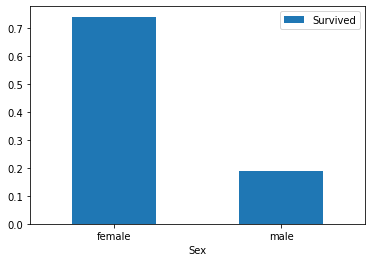

In [ ]:
df.groupby(['Sex'])[['Survived']].mean().plot(kind='bar', rot=0)
#sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

In [ ]:
sns.__version__

'0.11.1'

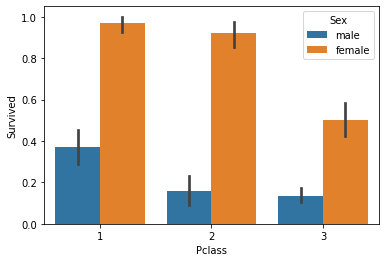

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.show()

#### 연령 범주화
 - get_category 함수를 이용하여 Age 열을 범주화하고 Age_cat열에 저장하세요.
     - apply함수를 이용하세요.
 - seaborn barplot을 이용하여 범주화된 연령(Age_cat)과 성별에 따른 생존률을 시각화하세요.
     - barplot의 옵션으로 order=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']을 이용하여 순서대로 출력되도록 하세요.

In [ ]:
def get_category(age):
    cat = ''
    if age<=-1:cat='Unknown'
    elif age<=5:cat='Baby'
    elif age<=12:cat='Child'
    elif age<=18:cat='Teenager'
    elif age<=25:cat='Student'
    elif age<=35:cat='Young Adult'
    elif age<=60:cat='Adult'
    else: cat='Elderly'
    return cat

In [ ]:
df['Age_cat'] = df['Age'].apply(get_category)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_cat
0,0,3,male,22.000000,1,0,7.2500,N,S,Student
1,1,1,female,38.000000,1,0,71.2833,C85,C,Adult
2,1,3,female,26.000000,0,0,7.9250,N,S,Young Adult
3,1,1,female,35.000000,1,0,53.1000,C123,S,Young Adult
4,0,3,male,35.000000,0,0,8.0500,N,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,N,S,Young Adult
887,1,1,female,19.000000,0,0,30.0000,B42,S,Student
888,0,3,female,29.699118,1,2,23.4500,N,S,Young Adult
889,1,1,male,26.000000,0,0,30.0000,C148,C,Young Adult


#### 그룹 별 통계 확인
 - 성별, Pclass, Age_cat 별 생존자 수를 데이터프레임의 형태로 출력하세요.
 - 성별 ,Pclass와 Age_cat의 모든 조합에 대해 생존자 수를 확인할 수 있도록 피벗테일을 출력하고 heatmap으로 시각화 하세요.
   - index => Sex, Pclass
   - columns => Age_cat
   - fill_value = 0

In [ ]:
pd.__version__

'1.1.0'

In [ ]:
df[df['Survived']==1].groupby(['Sex', 'Pclass', 'Age_cat'])[['Survived']].agg(['count'])

Survived
                             count
Sex    Pclass Age_cat             
female 1      Adult             35
              Elderly            2
              Student           16
              Teenager          10
              Young Adult       28
       2      Adult             17
              Baby               5
              Child              3
              Student           14
              Teenager           6
              Young Adult       25
       3      Adult              2
              Baby              11
              Elderly            1
              Student           11
              Teenager          11
              Young Adult       36
male   1      Adult             20
              Baby               2
              Child              1
              Elderly            1
              Student            3
              Teenager           1
              Young Adult       17
       2      Adult              1
              Baby               8
              Child              1
              Elderly            1
              Student            1
              Young Adult        5
       3      Adult              3
              Baby               5
              Child              4
              Student            9
              Teenager           2
              Young Adult       24

In [ ]:
df_pv = df[df['Survived']==1].pivot_table(index=['Sex', 'Pclass'], columns='Age_cat',
                                          values='Survived', aggfunc='count', fill_value=0)
df_pv

Age_cat        Adult  Baby  Child  Elderly  Student  Teenager  Young Adult
Sex    Pclass                                                             
female 1          35     0      0        2       16        10           28
       2          17     5      3        0       14         6           25
       3           2    11      0        1       11        11           36
male   1          20     2      1        1        3         1           17
       2           1     8      1        1        1         0            5
       3           3     5      4        0        9         2           24

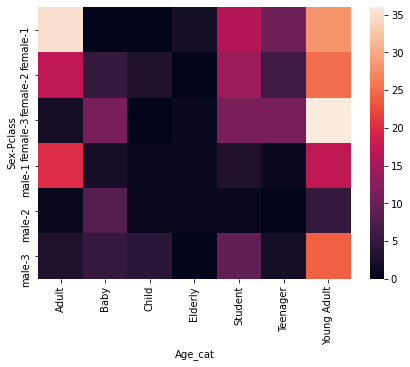

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df_pv)
plt.show()

### 데이터 변환 #2
 - df를 One-hot encoding을 이용하여 수치형으로 변환하여 df_vec에 저장하세요.
     - pd.get_dummies(df)를 실행하시면 됩니다.


In [ ]:
df_vec = pd.get_dummies(df)
df_vec

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A16,...,Embarked_N,Embarked_Q,Embarked_S,Age_cat_Adult,Age_cat_Baby,Age_cat_Child,Age_cat_Elderly,Age_cat_Student,Age_cat_Teenager,Age_cat_Young Adult
0,0,3,22.000000,1,0,7.2500,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,1,38.000000,1,0,71.2833,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
888,0,3,29.699118,1,2,23.4500,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### 데이터 재확인
 - df_vec 의 열 별 결측치를 조회하세요.

In [ ]:
df_vec.isna().sum()

Survived               0
Pclass                 0
Age                    0
SibSp                  0
Parch                  0
                      ..
Age_cat_Child          0
Age_cat_Elderly        0
Age_cat_Student        0
Age_cat_Teenager       0
Age_cat_Young Adult    0
Length: 148, dtype: int64

### 학습 데이터 준비
 - df를 X와 Y로 분리하세요.
   - X: 'Survived'를 제외한 모든 열
   - Y: 'Survived'

In [ ]:
X = df_vec.loc[:, df_vec.columns != 'Survived']
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A16,Cabin_A19,...,Embarked_N,Embarked_Q,Embarked_S,Age_cat_Adult,Age_cat_Baby,Age_cat_Child,Age_cat_Elderly,Age_cat_Student,Age_cat_Teenager,Age_cat_Young Adult
0,3,22.000000,1,0,7.2500,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,38.000000,1,0,71.2833,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
888,3,29.699118,1,2,23.4500,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
Y = df_vec.loc[:, 'Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### 여러 모델을 이용한 모델링
 - LogisticRegression
 - DecisionTree
 - RandomForest
 - GradientBoosting
 - XGBoost
 - LightGBM
 - 각 모델의 score를 각각 train_score, test_score에 저장한 후 plot으로 시각화 하세요.

In [ ]:
# 필수 모델 및 변수
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score

train_score = [0] * 6
test_score = [0] * 6

In [ ]:
!pip install xgboost

### 데이터 분할
 - dateset을 trainset과 testset으로 분할하세요.
 - 분할 비율은 train 75 : test 25입니다.
 - random_state = 0, 층화추출 적용

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=0)

### Logistic Regression
 - LogisticRegression 클래스를 이용하여 학습을 수행하세요.
 - 학습 데이터와 테스트 데이터의 score를 각각 출력하세요.
 - 수렴이 안 되는 경우 max_iter를 조절해보세요.

In [ ]:
# Code here
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

train_score[0] = model.score(x_train,y_train)
test_score[0] = model.score(x_test,y_test)

print("train score:{:.2f}".format(train_score[0]))
print("test score:{:.2f}".format(test_score[0]))

train score:0.84
test score:0.78


### Decision Tree
 - DecisionTreeClassifier 클래스를 이용하여 학습을 수행하세요.
 - 학습 데이터와 테스트 데이터의 score를 각각 출력하세요.
 - random_state=0
 - 결과가 잘 나오도록 max_depth를 조절해보세요.

In [ ]:
# Code here
model = DecisionTreeClassifier(random_state=0, max_depth=10)
model.fit(x_train,y_train)

train_score[1] = model.score(x_train,y_train)
test_score[1] = model.score(x_test,y_test)

print("train score:{:.2f}".format(train_score[1]))
print("test score:{:.2f}".format(test_score[1]))

train score:0.94
test score:0.79


### Random Forest
 - RandomForestClassifier 클래스를 이용하여 학습을 수행하세요.
 - 학습 데이터와 테스트 데이터의 score를 각각 출력하세요.
 - random_state=0
 - 결과가 잘 나오도록 max_depth를 조절해보세요.

In [ ]:
# Code here
model = RandomForestClassifier(random_state=0, max_depth=11)
model.fit(x_train,y_train)

train_score[2] = model.score(x_train,y_train)
test_score[2] = model.score(x_test,y_test)

print("train score:{:.2f}".format(train_score[2]))
print("test score:{:.2f}".format(test_score[2]))

train score:0.93
test score:0.83


### Gradient Boosting
 - GradientBoostingClassifier 클래스를 이용하여 학습을 수행하세요.
 - 학습 데이터와 테스트 데이터의 score를 각각 출력하세요.
 - 결과가 잘 나오도록 n_estimators를 조절해보세요.

In [ ]:
# Code here
model = GradientBoostingClassifier(n_estimators=500)
model.fit(x_train,y_train)

train_score[3] = model.score(x_train,y_train)
test_score[3] = model.score(x_test,y_test)

print("train score:{:.2f}".format(train_score[3]))
print("test score:{:.2f}".format(test_score[3]))

train score:0.95
test score:0.83


### XGBoost
 - XGBClassifier 클래스를 이용하여 학습을 수행하세요.
 - 학습 데이터와 테스트 데이터의 score를 각각 출력하세요.

In [ ]:
model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train, y_train)

p_train = model.predict(x_train)
p_test = model.predict(x_test)

train_score[4] = model.score(x_train,y_train)
test_score[4] = model.score(x_test,y_test)

print("train score:{:.2f}".format(train_score[4]))
print("test score:{:.2f}".format(test_score[4]))

train score:0.98
test score:0.83


### LightGBM
 - LGBMClassifier 클래스를 이용하여 학습을 수행하세요.
 - 학습 데이터와 테스트 데이터의 score를 각각 출력하세요.
 - 결과가 잘 나오도록 n_estimators를 조절해보세요.

In [ ]:
model = LGBMClassifier(n_estimators=60)
model.fit(x_train, y_train)

p_train = model.predict(x_train)
p_test = model.predict(x_test)

train_score[5] = model.score(x_train,y_train)
test_score[5] = model.score(x_test,y_test)

print("train score:{:.2f}".format(train_score[5]))
print("test score:{:.2f}".format(test_score[5]))

train score:0.93
test score:0.82


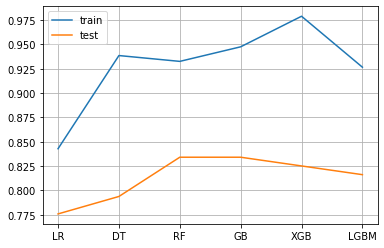

In [ ]:
data_x = ['LR', 'DT', 'RF', 'GB', 'XGB' ,'LGBM']
plt.plot(data_x, train_score, label='train')
plt.plot(data_x, test_score, label='test')
plt.legend()
plt.grid()